## Etape 1 : Initialisation des modules Python

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import sys
# sys.path.append('..')
import ep.etools as ept

fit_verbosity = 1


In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices())

2.9.2
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# from tensorflow.python.compiler import mlcompute
# mlcompute.set_mlc_device(device_name='gpu')

## Etape 2 : Récupération des données

depuis Keras on charge les train_set et test_set de la dataset MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


## Etape 3 : Préparation des données

* on calcul moyenne et écart-type
* on normalise pour obtenir un dataset de moyenne zéro et d'écart-type 0.

dans le cas présent on divise simplement par le maxi qui doite être 255 !

In [4]:
xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('Aprés normalisation  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Aprés normalisation  : Min=0.0, max=1.0


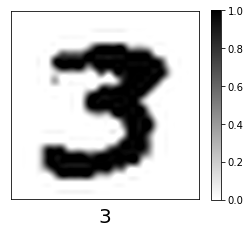

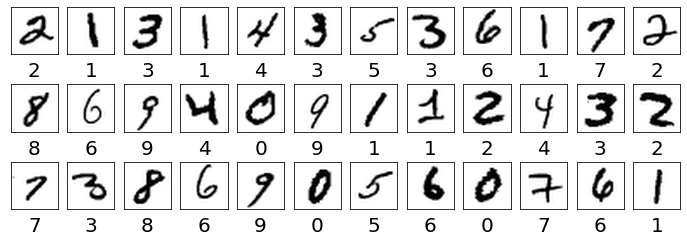

In [5]:
ept.plot_images(x_train,y_train , [27],  x_size=5,y_size=5, colorbar=True) #, save_as='01-one-digit')
# plt.imshow(x_train[0], cmap='Blues')
ept.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')


## Etape 4 - Création du model
Les informations se trouvent ci-aprés : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [6]:
model = keras.Sequential()
model.add(keras.layers.Input((28, 28,1)))

model.add(keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.15))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.15))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2023-08-16 14:35:39.029361: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-16 14:35:39.029551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                             

In [7]:
# second modèle tyype inception en mode API
#
inputs = keras.Input((28,28,1))

x1 = keras.layers.Conv2D(16,(3,3),padding='same',activation='relu')(inputs)
x1 = keras.layers.MaxPooling2D((2,2))(x1)
x1 = keras.layers.Dropout(0.15)(x1)
x1 = keras.layers.Conv2D(64,(3,3),padding='valid',activation='relu')(x1)
x1 = keras.layers.MaxPooling2D((2,2))(x1)
x1 = keras.layers.Dropout(0.15)(x1)
x1 = keras.layers.Conv2D(64,(3,3),padding='valid',activation='relu')(x1)
x1 = keras.layers.MaxPooling2D((2,2))(x1)
x1 = keras.layers.Dropout(0.10)(x1)

x2 = keras.layers.Conv2D(8,(3,3),padding='same',activation='relu')(inputs)
x2 = keras.layers.MaxPooling2D((3,3))(x2)
x2 = keras.layers.Dropout(0.10)(x2)
x2 = keras.layers.Conv2D(64,(3,3),padding='valid',activation='relu')(x2)
x2 = keras.layers.MaxPooling2D((3,3))(x2)
x2 = keras.layers.Dropout(0.10)(x2)

x3 = keras.layers.Conv2D(64,(4,4),strides=(3,3),padding='valid',activation='relu')(inputs)
x3 = keras.layers.MaxPooling2D((4,4))(x3)
x3 = keras.layers.Dropout(0.10)(x3)

x4 = keras.layers.Conv2D(16,(3,3),strides=(1,1),padding='same',activation='sigmoid')(inputs)
x4 = keras.layers.MaxPooling2D((2,2))(x4)
x4 = keras.layers.Dropout(0.15)(x4)
x4 = keras.layers.Conv2D(32,(3,3),strides=(1,1),padding='valid',activation='sigmoid')(x4)
x4 = keras.layers.MaxPooling2D((2,2))(x4)
x4 = keras.layers.Dropout(0.10)(x4)
x4 = keras.layers.Conv2D(64,(3,3),strides=(1,1),padding='valid',activation='sigmoid')(x4)
x4 = keras.layers.MaxPooling2D((2,2))(x4)
x4 = keras.layers.Dropout(0.10)(x4)

# x4 = keras.layers.Flatten()(inputs)
# x4 = keras.layers.Dense(32, activation='relu')(x4)
# x4 = keras.layers.Dropout(0.10)(x4)
# x4 = keras.layers.Dense(128, activation='relu')(x4)
# x4 = keras.layers.Dropout(0.10)(x4)
# x4 = keras.layers.Dense(256, activation='relu')(x4)
# x4 = keras.layers.Dropout(0.10)(x4)
# x4 = tf.reshape(x4,(-1,2,2,64))

print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)

x = keras.layers.concatenate([x1,x2,x3,x4],axis=1)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64,activation='relu')(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(64,activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(10,activation='softmax')(x)

model = keras.Model(inputs,outputs)
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

(None, 2, 2, 64)
(None, 2, 2, 64)
(None, 2, 2, 64)
(None, 2, 2, 64)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 28, 28, 16)   160         ['input_2[0][0]']                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 28, 28, 16)   160         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 16)  0           ['conv2d_2[0][0]']               
                          

In [9]:
# second modèle tyype inception en mode API standard
#
inputs = keras.Input((28,28,1))

x1 = keras.layers.Conv2D(16,(3,3),strides=(3,3),padding='valid',activation='relu')(inputs)
x2 = keras.layers.MaxPooling2D((3,3))(inputs)
x3 = keras.layers.Conv2D(16,(3,3),strides=(1,1),padding='same',activation='relu')(inputs)
x3 = keras.layers.Conv2D(32,(4,4),strides=(3,3),padding='valid',activation='relu')(x3)
x4 = keras.layers.Conv2D(64,(4,4),strides=(3,3),padding='valid',activation='relu')(inputs)
# x1 = keras.layers.Dropout(0.15)(x1)

print (x1.shape)
print (x2.shape)
print (x3.shape)
print (x4.shape)

x = keras.layers.concatenate([x1,x2,x3,x4])

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64,activation='relu')(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(64,activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(10,activation='softmax')(x)

model = keras.Model(inputs,outputs)
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

(None, 9, 9, 16)
(None, 9, 9, 1)
(None, 9, 9, 32)
(None, 9, 9, 64)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_12 (Conv2D)             (None, 28, 28, 16)   160         ['input_3[0][0]']                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 9, 9, 16)     160         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_11 (MaxPooling2D  (None, 9, 9, 1)     0           ['input_3[0][0]']                
 )                       

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model=model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Etape 5 : Entrainement du Model

In [9]:
batch_size = 512
epochs = 16

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose= fit_verbosity,
                    validation_data=(x_test, y_test))

Epoch 1/16


2023-08-16 14:37:05.930169: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-16 14:37:06.406477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - ETA: 0s - loss: 1.2637 - accuracy: 0.5593

2023-08-16 14:37:17.114712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 12s 75ms/step - loss: 1.2637 - accuracy: 0.5593 - val_loss: 0.1969 - val_accuracy: 0.9460
Epoch 2/16
118/118 [==============================] - 8s 68ms/step - loss: 0.3370 - accuracy: 0.8968 - val_loss: 0.1012 - val_accuracy: 0.9676
Epoch 3/16
118/118 [==============================] - 8s 68ms/step - loss: 0.2120 - accuracy: 0.9383 - val_loss: 0.0700 - val_accuracy: 0.9774
Epoch 4/16
118/118 [==============================] - 8s 67ms/step - loss: 0.1663 - accuracy: 0.9535 - val_loss: 0.0563 - val_accuracy: 0.9817
Epoch 5/16
118/118 [==============================] - 8s 68ms/step - loss: 0.1344 - accuracy: 0.9614 - val_loss: 0.0451 - val_accuracy: 0.9867
Epoch 6/16
118/118 [==============================] - 8s 68ms/step - loss: 0.1157 - accuracy: 0.9673 - val_loss: 0.0432 - val_accuracy: 0.9859
Epoch 7/16
118/118 [==============================] - 8s 68ms/step - loss: 0.1023 - accuracy: 0.9716 - val_loss: 0.0389 - val_accuracy: 0.9869
Epoch 8/1

## Etape 6 : On évalue le Model

### 6.1/ Résultat final Loss & Accuracy

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.024753669276833534
Test accuracy : 0.9922999739646912


### 6.2/ Vitesse d'apprentissage

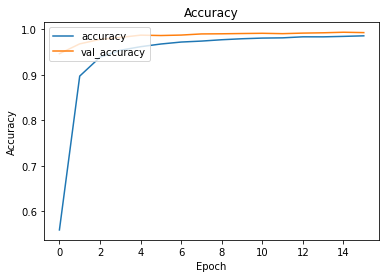

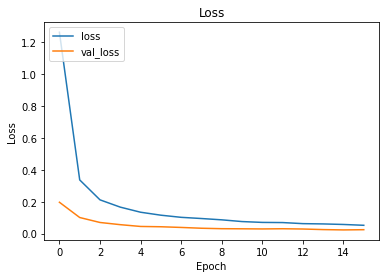

In [11]:
ept.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3/ Quelques examples

  8/313 [..............................] - ETA: 2s 

2023-08-16 14:39:50.246476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step


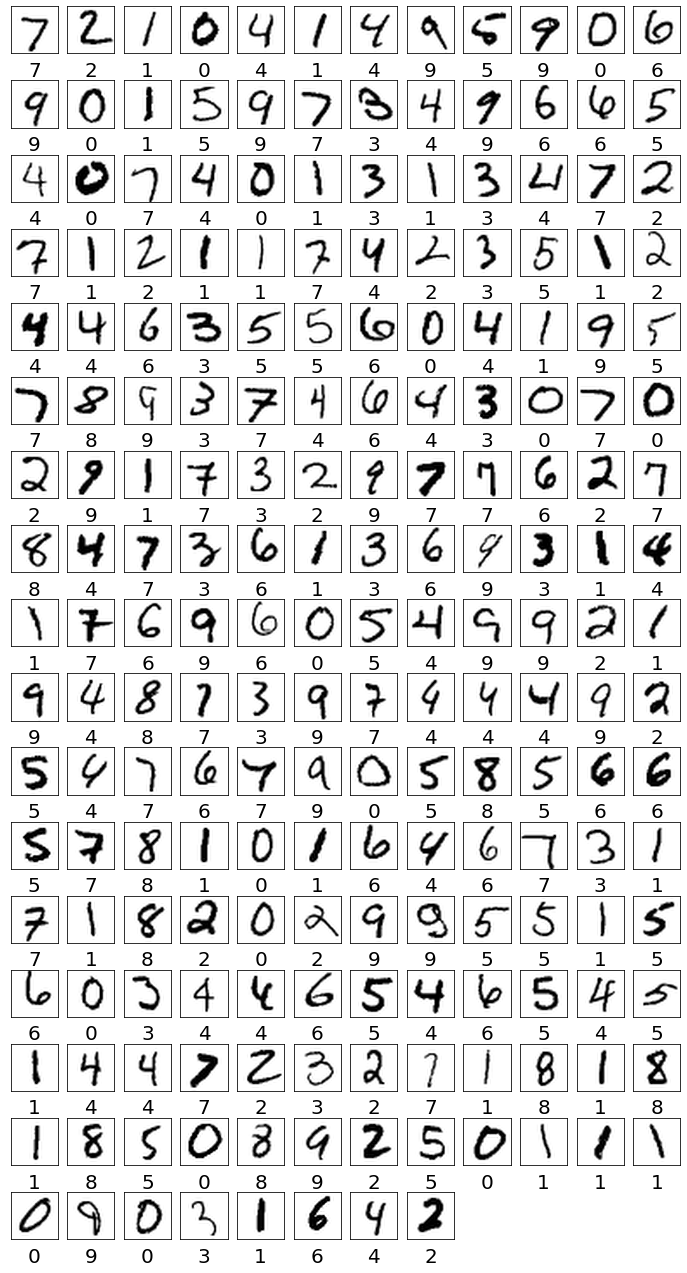

In [12]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

ept.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4/ Quelques erreurs

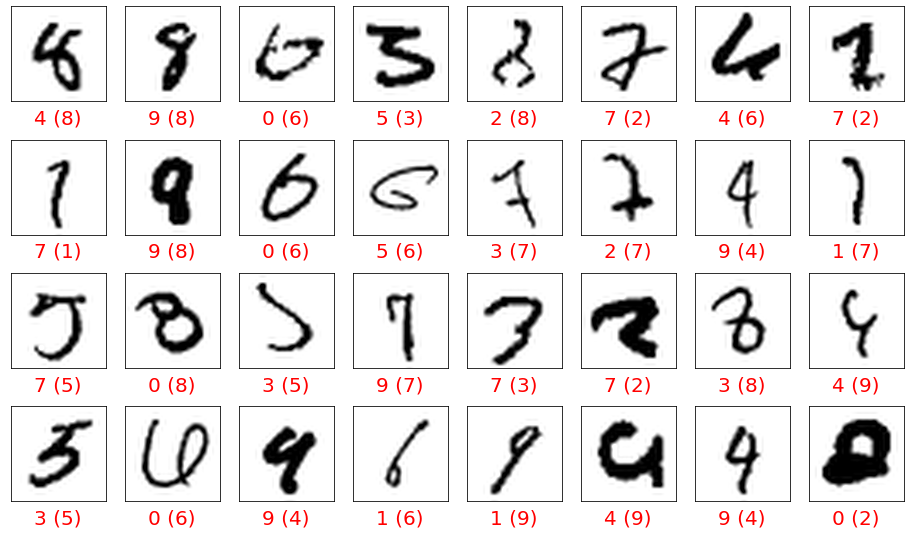

In [13]:
errors = [i for i in range(len(x_test)) if y_pred[i] != y_test[i]]
errors = errors[:min(32, len(errors))]
ept.plot_images(x_test, y_test, errors[:32], columns=8,
                x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')


### 6.5/ La matrice de confusion

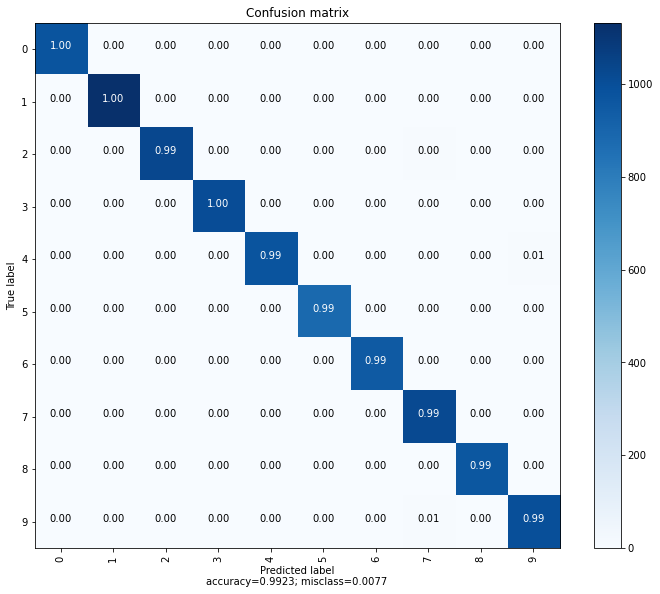

In [14]:
ept.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

# the end